### Problem Statement

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

### Aim of Analysis

#### The company wants to know:

#### 1) Which variables are significant in predicting the price of a house, and

#### 2) How well those variables describe the price of a house.

### Importing all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


import warnings
warnings.filterwarnings('ignore')


### Loading Data

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',100)

In [3]:
df = pd.read_csv('housing_data.csv')

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Structure of Data

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### `Id` column has not any value in our analysis and modelling so we drop it

In [7]:
df = df.drop(columns=['Id'])

##### A quick glance  of data

In [8]:
df.describe(percentiles=[0.25,0.50,0.75,0.95,0.97])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
97%,160.000000,120.000000,21571.800000,9.000000,8.000000,2007.000000,2008.000000,574.410000,1375.990000,546.230000,1589.380000,1905.460000,1981.610000,1245.530000,0.000000,2633.230000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,10.000000,2.000000,2008.000000,3.000000,884.000000,385.380000,213.230000,216.000000,0.000000,192.000000,0.000000,400.000000,12.000000,2010.000000,374230.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.00

In [9]:
df.duplicated().sum()

0

##### No duplicated rows in data

### Handling missing values

##### Finding column which has null value present

In [10]:
column_hv_nulls = [col for col in df.columns if df[col].isnull().sum() != 0]
column_hv_nulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

##### Quantifying null values in columns

In [11]:
for cols in column_hv_nulls:
    print(f'{cols} :- {df[cols].isnull().sum()}    null-percent {round((df[cols].isnull().sum())/len(df),2)*100}%')

LotFrontage :- 259    null-percent 18.0%
Alley :- 1369    null-percent 94.0%
MasVnrType :- 872    null-percent 60.0%
MasVnrArea :- 8    null-percent 1.0%
BsmtQual :- 37    null-percent 3.0%
BsmtCond :- 37    null-percent 3.0%
BsmtExposure :- 38    null-percent 3.0%
BsmtFinType1 :- 37    null-percent 3.0%
BsmtFinType2 :- 38    null-percent 3.0%
Electrical :- 1    null-percent 0.0%
FireplaceQu :- 690    null-percent 47.0%
GarageType :- 81    null-percent 6.0%
GarageYrBlt :- 81    null-percent 6.0%
GarageFinish :- 81    null-percent 6.0%
GarageQual :- 81    null-percent 6.0%
GarageCond :- 81    null-percent 6.0%
PoolQC :- 1453    null-percent 100.0%
Fence :- 1179    null-percent 81.0%
MiscFeature :- 1406    null-percent 96.0%


##### Clearly as visible there are some columns which have large missing values ,we are going to drop that all columns 

In [12]:
df = df.drop(columns=[cols for cols in df.columns if df[cols].isnull().mean() >= 0.40])

##### Now we have only those column which have low percentage of null values ,We will Impute these with appropriate values

In [13]:
cols_hav_nulls = column_hv_nulls = [col for col in df.columns if df[col].isnull().sum() != 0]
for cols in column_hv_nulls:
    print(f'{cols} :- {df[cols].isnull().sum()}    null-percent {round((df[cols].isnull().sum())/len(df),2)*100}%')

LotFrontage :- 259    null-percent 18.0%
MasVnrArea :- 8    null-percent 1.0%
BsmtQual :- 37    null-percent 3.0%
BsmtCond :- 37    null-percent 3.0%
BsmtExposure :- 38    null-percent 3.0%
BsmtFinType1 :- 37    null-percent 3.0%
BsmtFinType2 :- 38    null-percent 3.0%
Electrical :- 1    null-percent 0.0%
GarageType :- 81    null-percent 6.0%
GarageYrBlt :- 81    null-percent 6.0%
GarageFinish :- 81    null-percent 6.0%
GarageQual :- 81    null-percent 6.0%
GarageCond :- 81    null-percent 6.0%


##### Extracting numerical columns from dataframe

In [14]:
numerical_cols = df.select_dtypes(include='number').columns.to_list()

In [15]:
num_cols_impute = [col for col in numerical_cols if df[col].isnull().sum() != 0]
num_cols_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

##### Imputing numericals columns with `mean` values with their respective column

In [16]:
num_cols_impute = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in num_cols_impute:
    imputer_num = SimpleImputer(strategy='mean')
    df[[col]] = imputer_num.fit_transform(df[[col]])

##### Extracting categorical columns from Dataframe

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

##### These categorical columns have null values ,we will impute with most-frequrnt value with their respective column

In [18]:
cat_cols_impute = [col for col in categorical_cols if df[col].isnull().sum() != 0]
cat_cols_impute

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [19]:
for col in cat_cols_impute:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[[col]] = imputer_cat.fit_transform(df[[col]])

##### Analysis of Categorical columns 

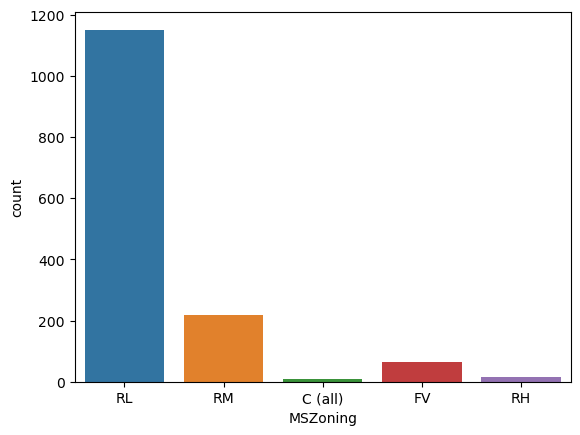

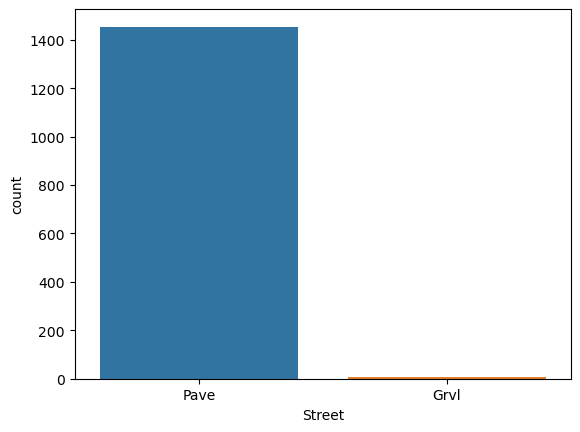

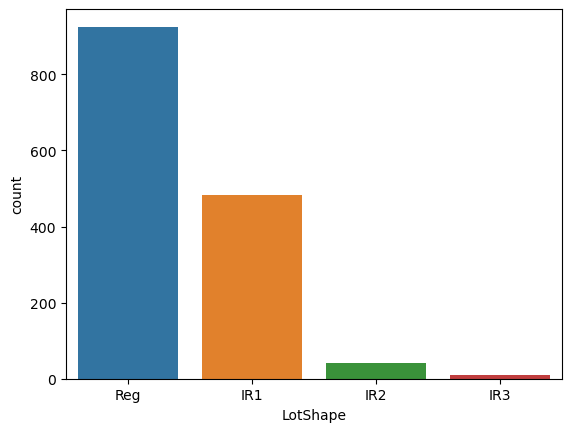

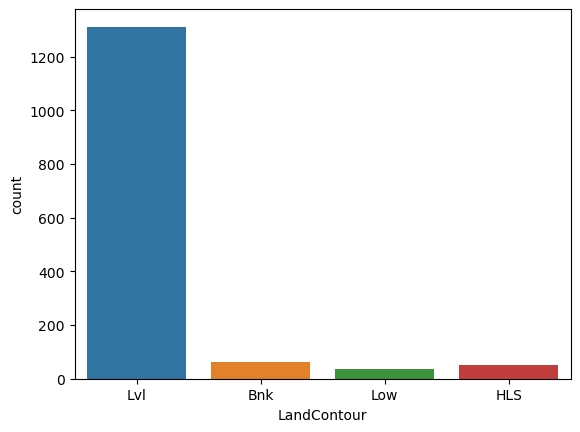

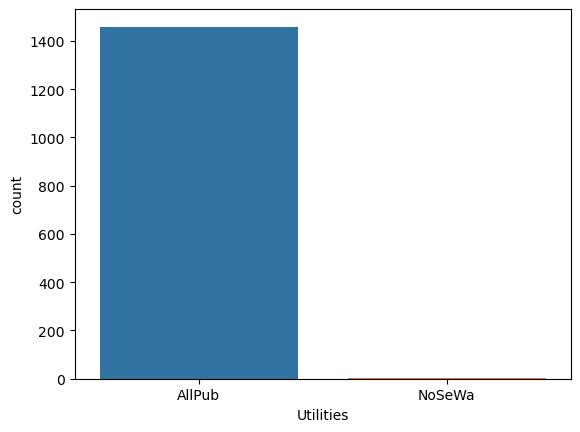

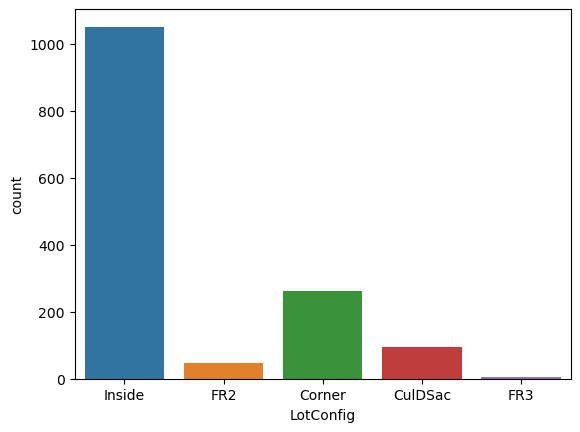

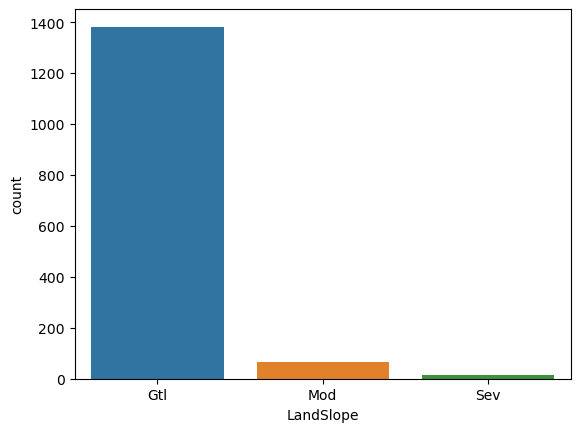

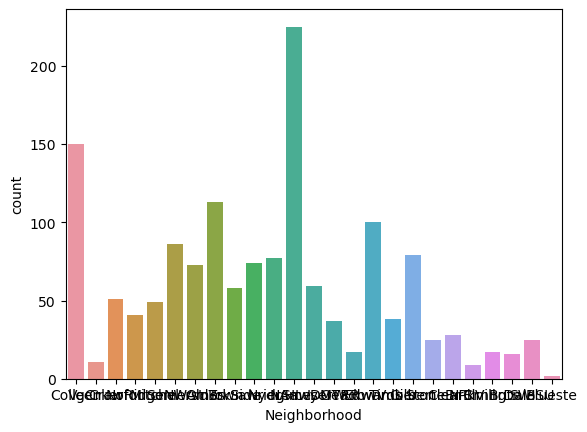

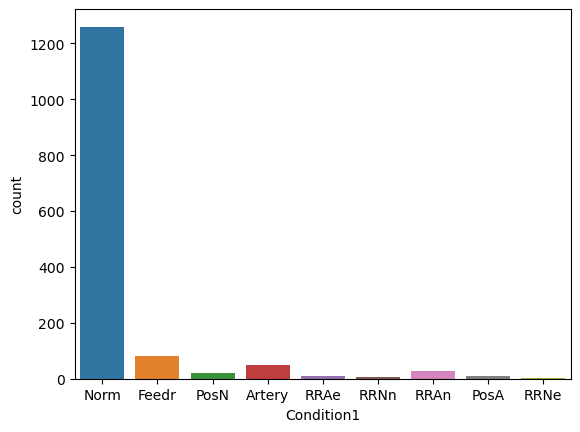

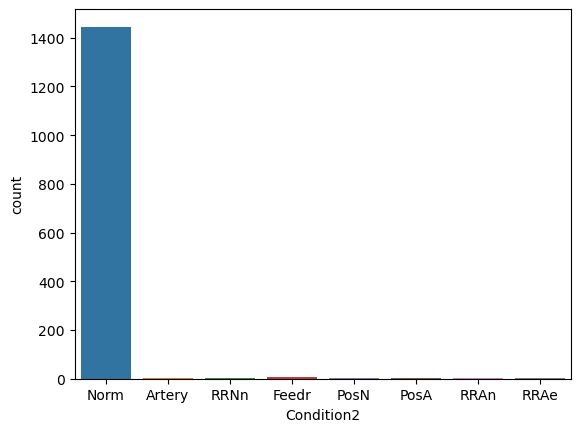

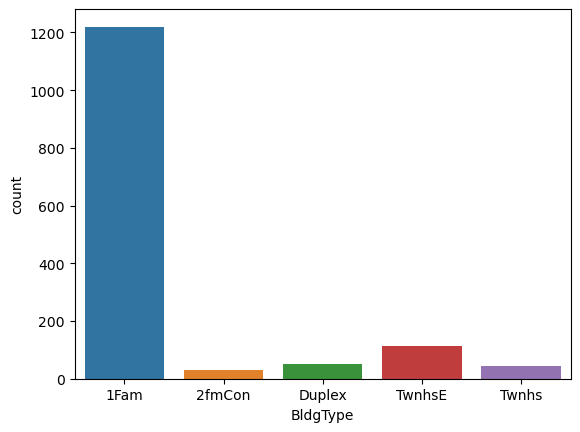

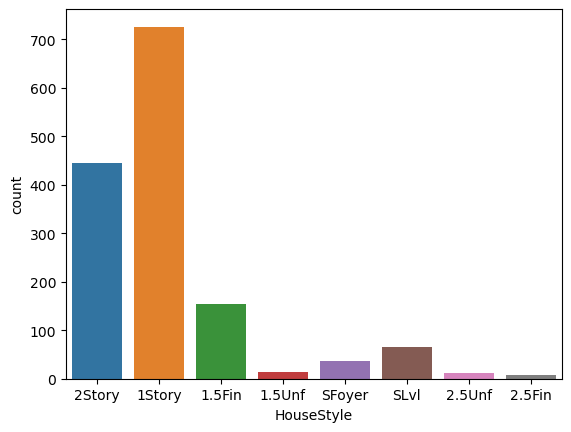

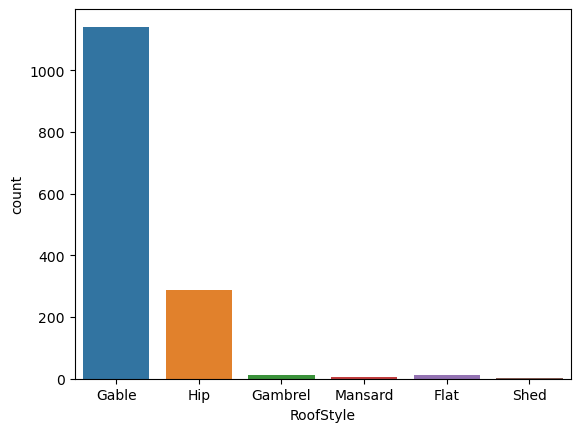

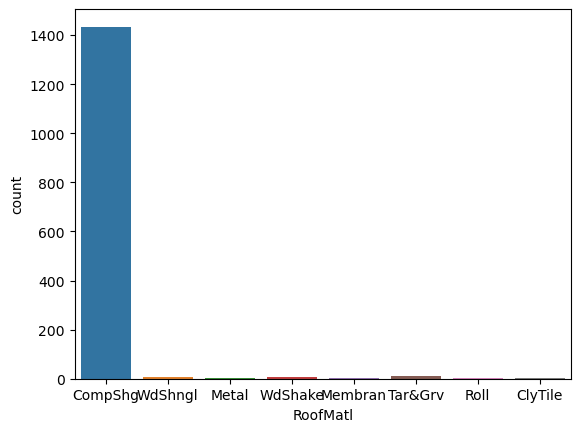

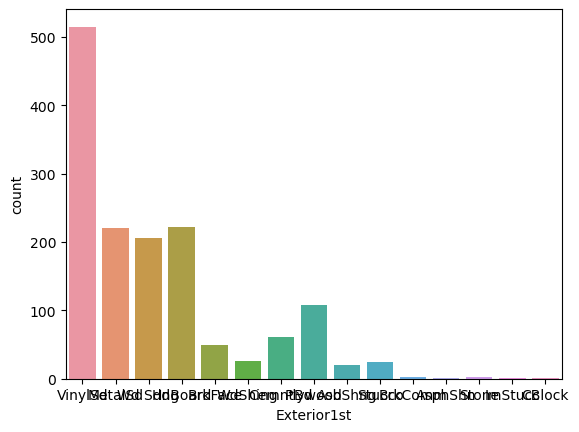

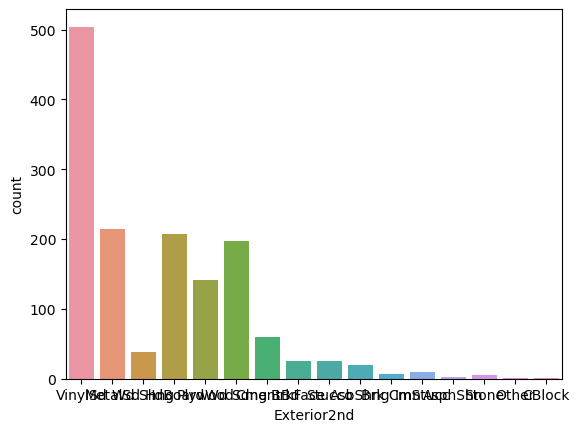

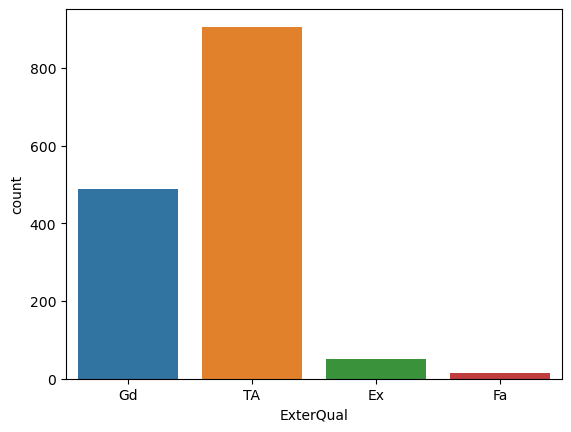

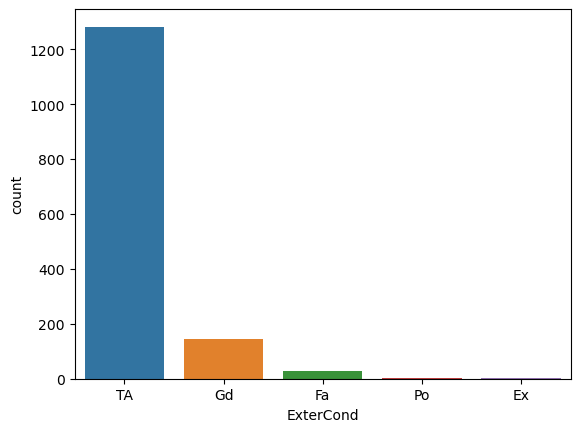

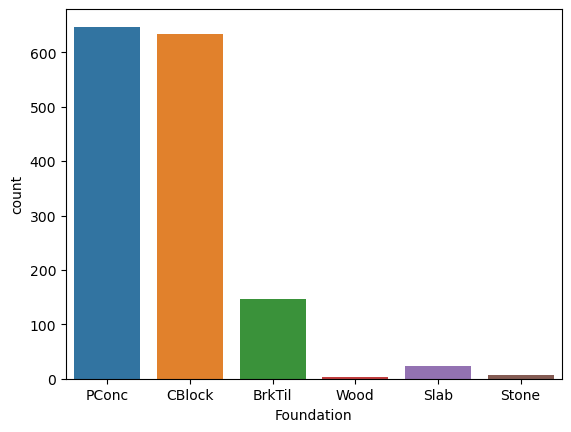

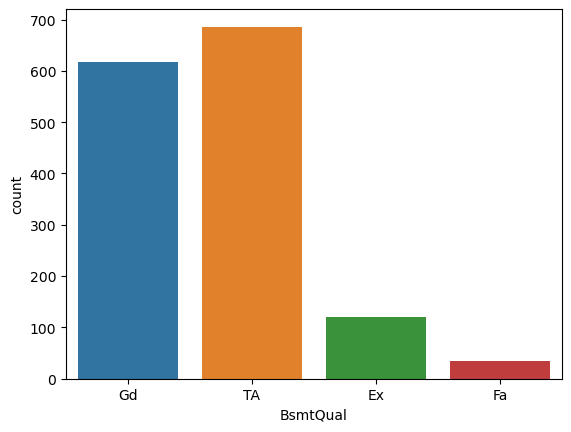

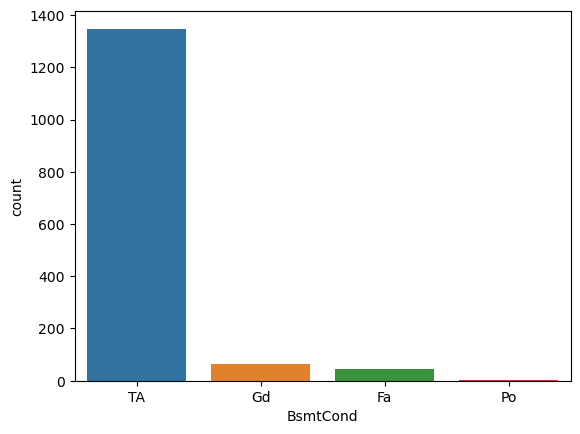

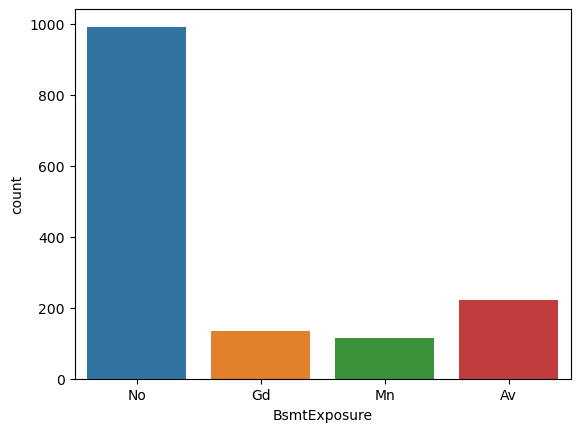

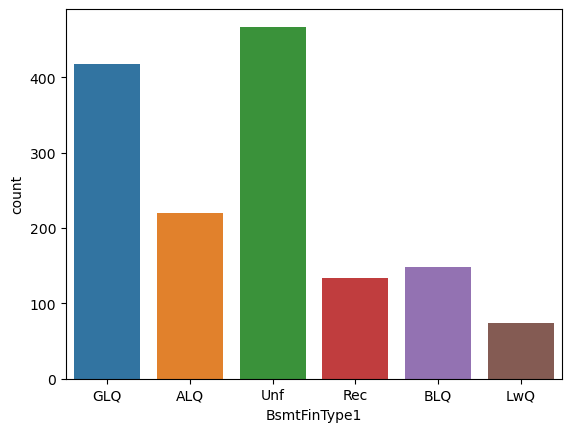

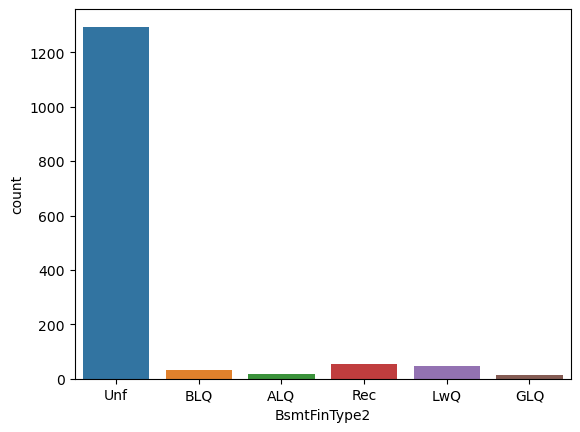

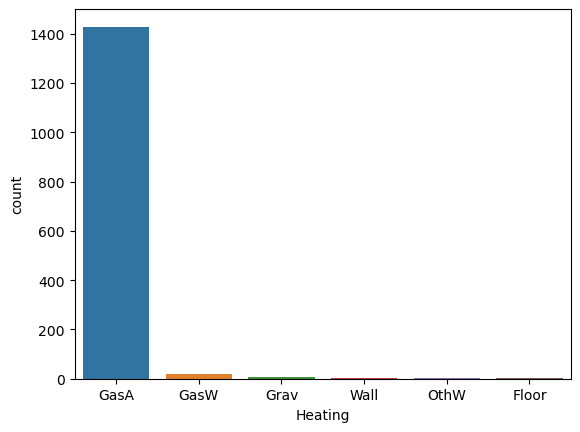

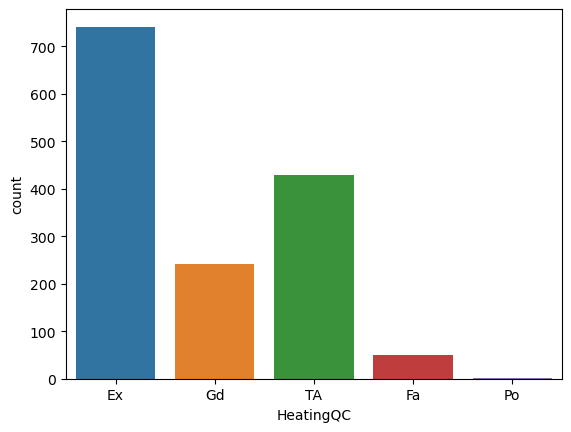

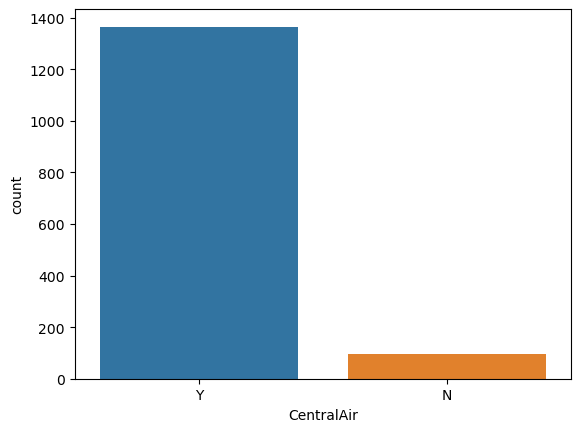

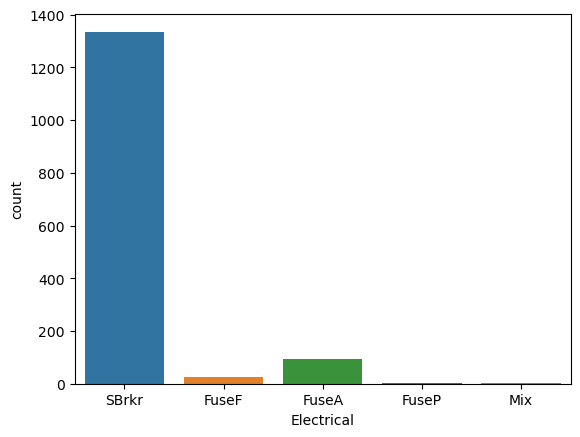

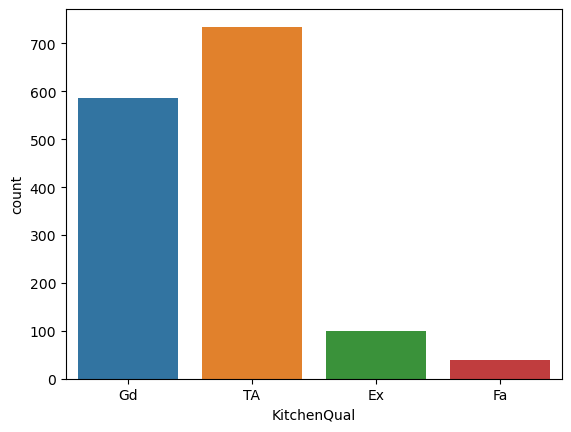

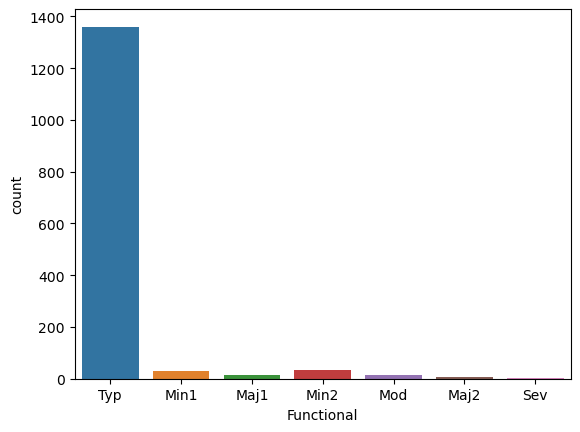

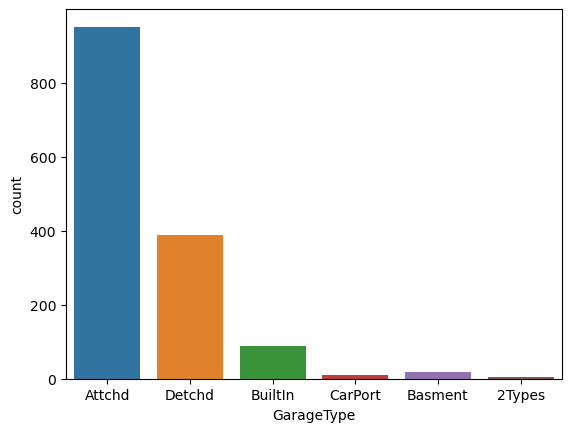

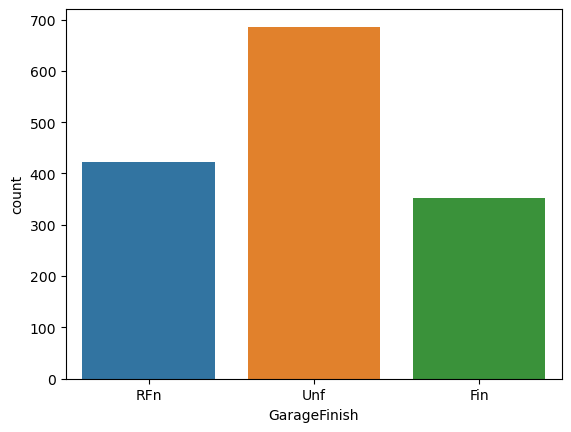

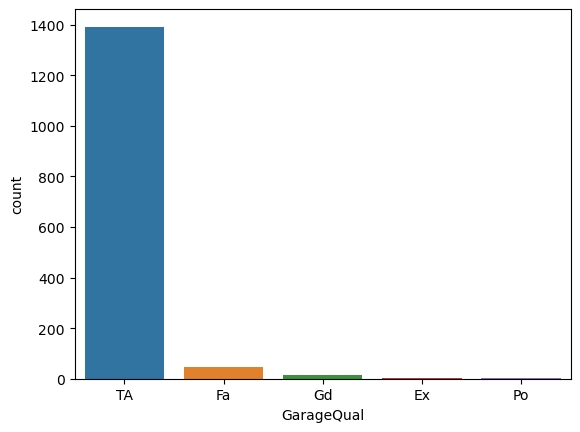

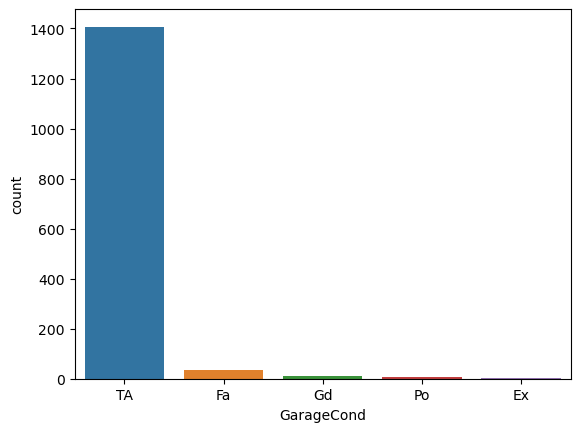

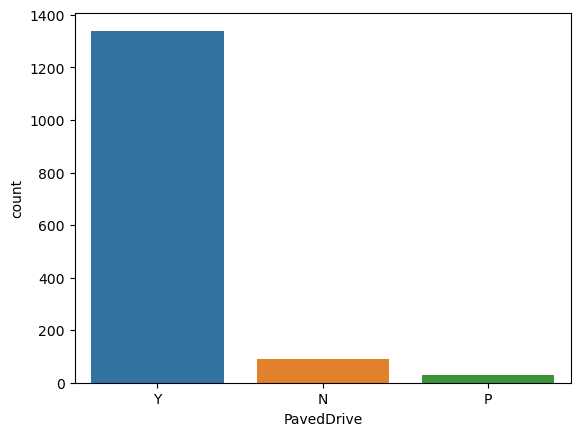

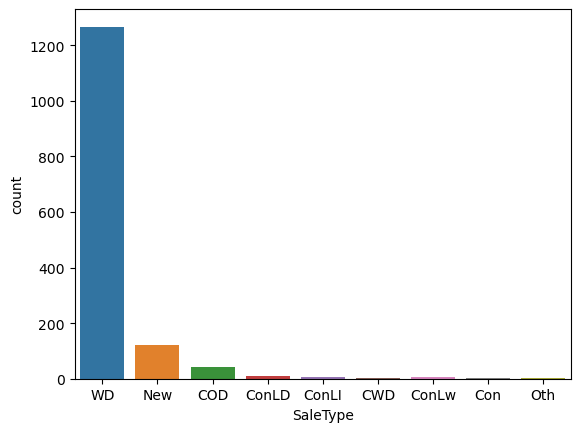

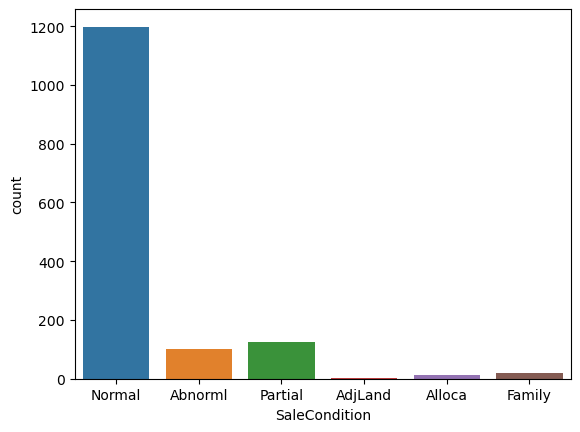

In [20]:
for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.show()

##### There are some column which are Single Valued or very minimal variation ,we will drop it because it serve no purpose in our analysis and modelling,Let's see how many columns are there

In [21]:
for col in categorical_cols:
    print(df[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype:

In [22]:
df = df.drop(columns=['Street','Utilities','Condition2','RoofMatl'])

### Outliers Treatment

In [23]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

##### Since increase in Lot Area with Increasing percentiles is steady except for 0.99 percentiles ,so we will keep threshold value as of 0.97 percentiles

In [24]:
df['LotArea'].quantile([0.25,0.5,0.75,0.95,0.97,0.99])

0.25     7553.50
0.50     9478.50
0.75    11601.50
0.95    17401.15
0.97    21571.80
0.99    37567.64
Name: LotArea, dtype: float64

##### Extracting Dataframe i.e. LotArea < 21571.80 (0.97 percentile)

In [25]:
housing_data = df[~(df['LotArea'] >= 21571.80)]

##### Distribution of Data Before and after Removing Outliers

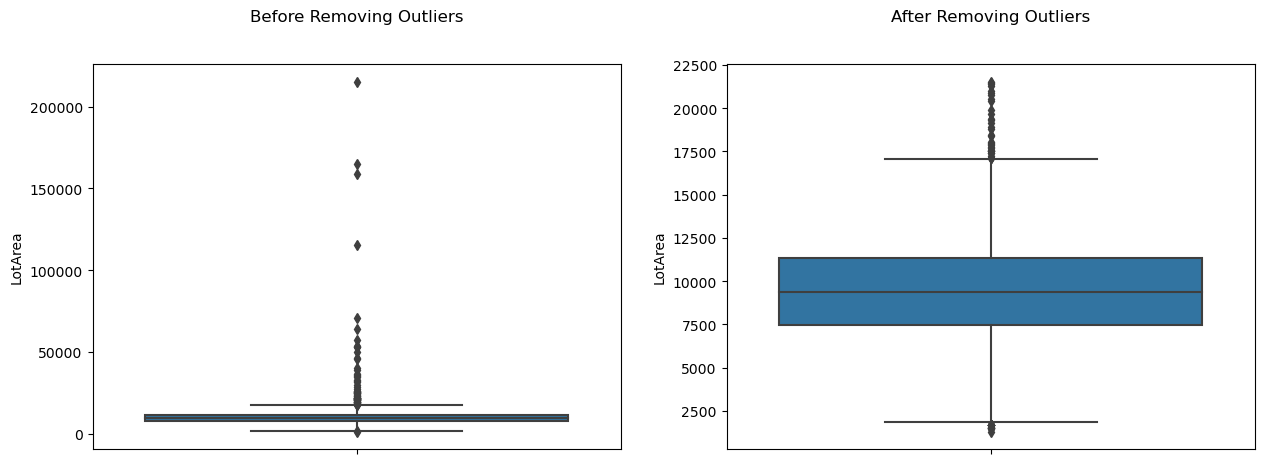

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y = df['LotArea'])
plt.title('Before Removing Outliers\n\n')
plt.subplot(1,2,2)
sns.boxplot(y = housing_data['LotArea'])
plt.title('After Removing Outliers\n\n')
plt.show()

### Exploratory data analysis

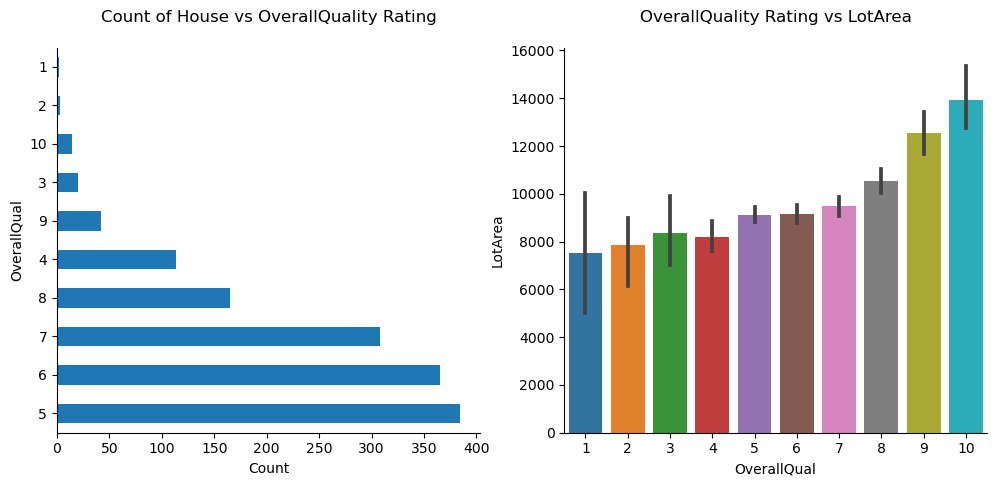

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
housing_data['OverallQual'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.title('Count of House vs OverallQuality Rating\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.subplot(1,2,2)
sns.barplot(data=housing_data,x=housing_data['OverallQual'],y=housing_data['LotArea'])
plt.title('OverallQuality Rating vs LotArea\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

##### House those have `OverallOual` rated as `5` and `6` are maximum also trend between `OverallQual` and `LotArea` can be seen as above

<Axes: xlabel='LotArea', ylabel='SalePrice'>

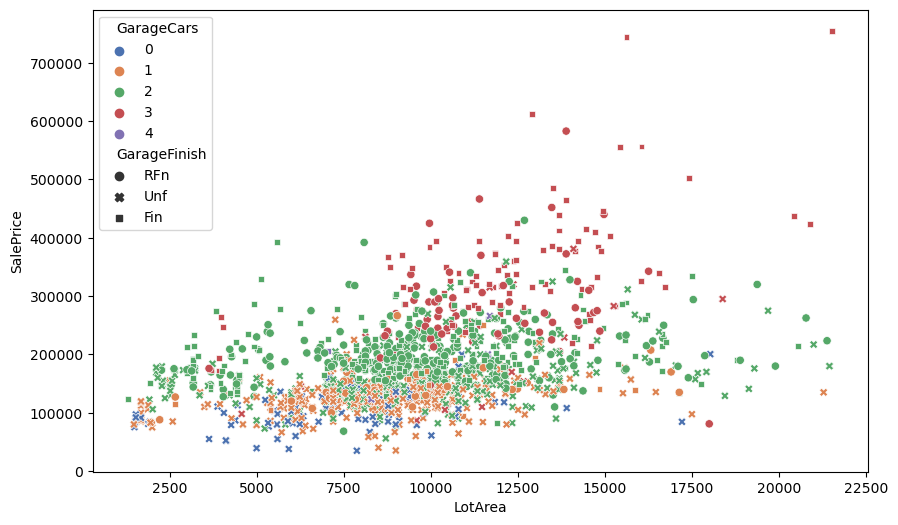

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=housing_data['LotArea'],y=housing_data['SalePrice'],hue=housing_data['GarageCars'],style=housing_data['GarageFinish'],palette='deep')

##### An Interesting Pattern can be seen here, `SalePrice` of the houses which has more `GarageCars` capacity are Expensive even for same `LotArea` and also for same Car Capacity Garages Houses which have Roughly Finished or Finished Garages are Expensive.

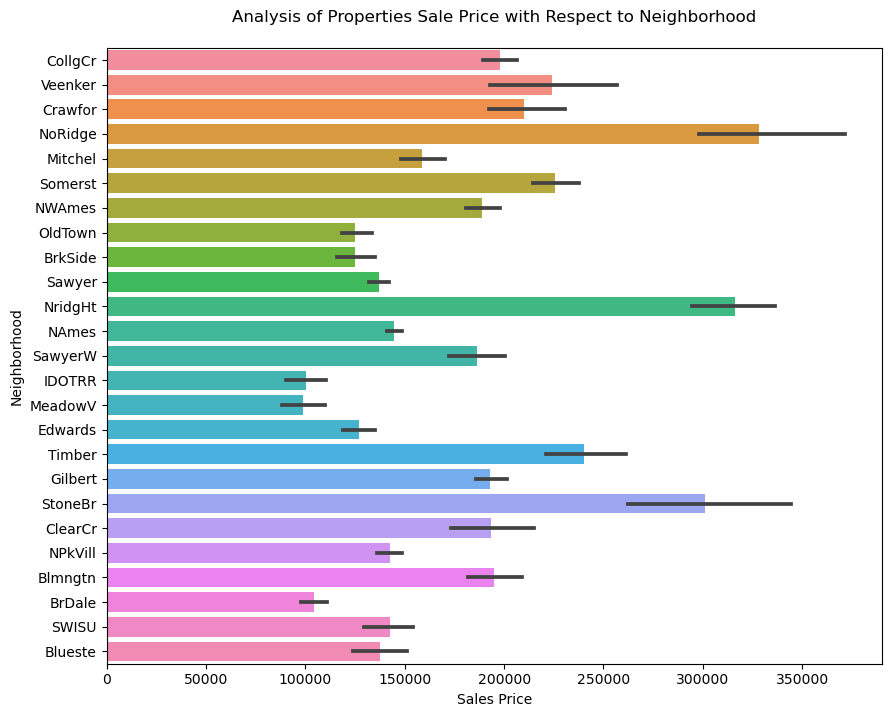

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(data=housing_data,y=housing_data['Neighborhood'],x=housing_data['SalePrice'],orient='horizontal',saturation=0.9)
plt.title('Analysis of Properties Sale Price with Respect to Neighborhood\n')
plt.xlabel('Sales Price')
plt.show()

##### `Northridge` ,`Northridge Heights` and `Stone Brook`  Neighborhood houses have high selling Price 

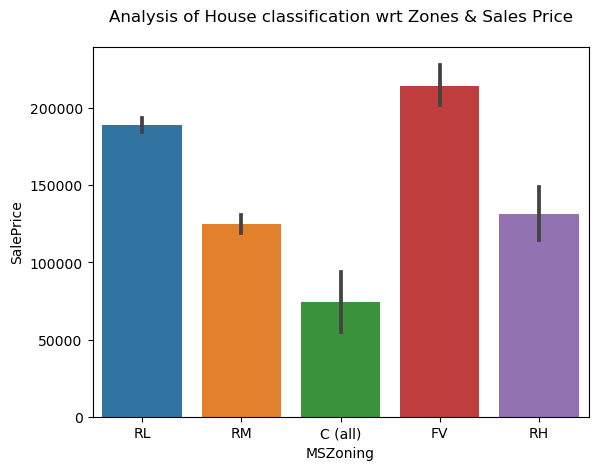

In [30]:
sns.barplot(data=housing_data,x=housing_data['MSZoning'],y=housing_data['SalePrice'])
plt.title('Analysis of House classification wrt Zones & Sales Price\n')
plt.show()

##### `FV - Floating Village Residentials` and `RL - Residentials Low Density ` have highest Sales Price

<Figure size 1500x700 with 0 Axes>

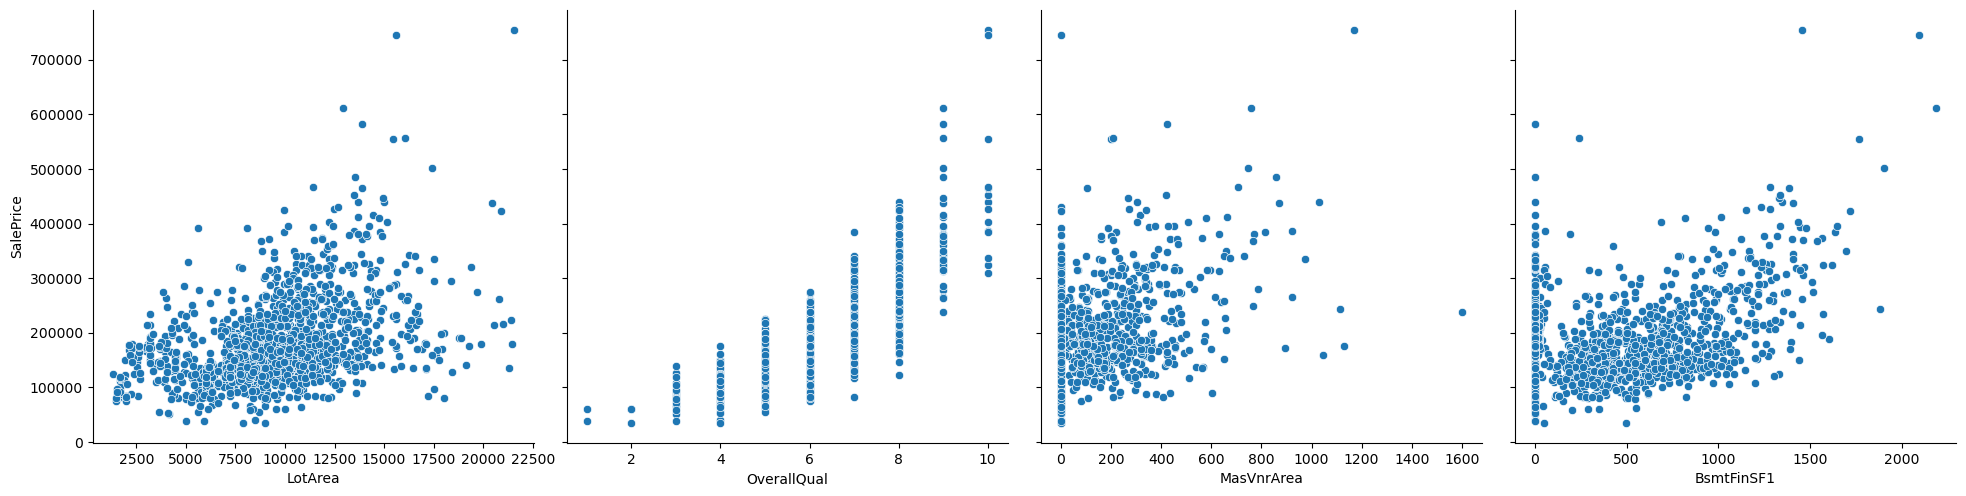

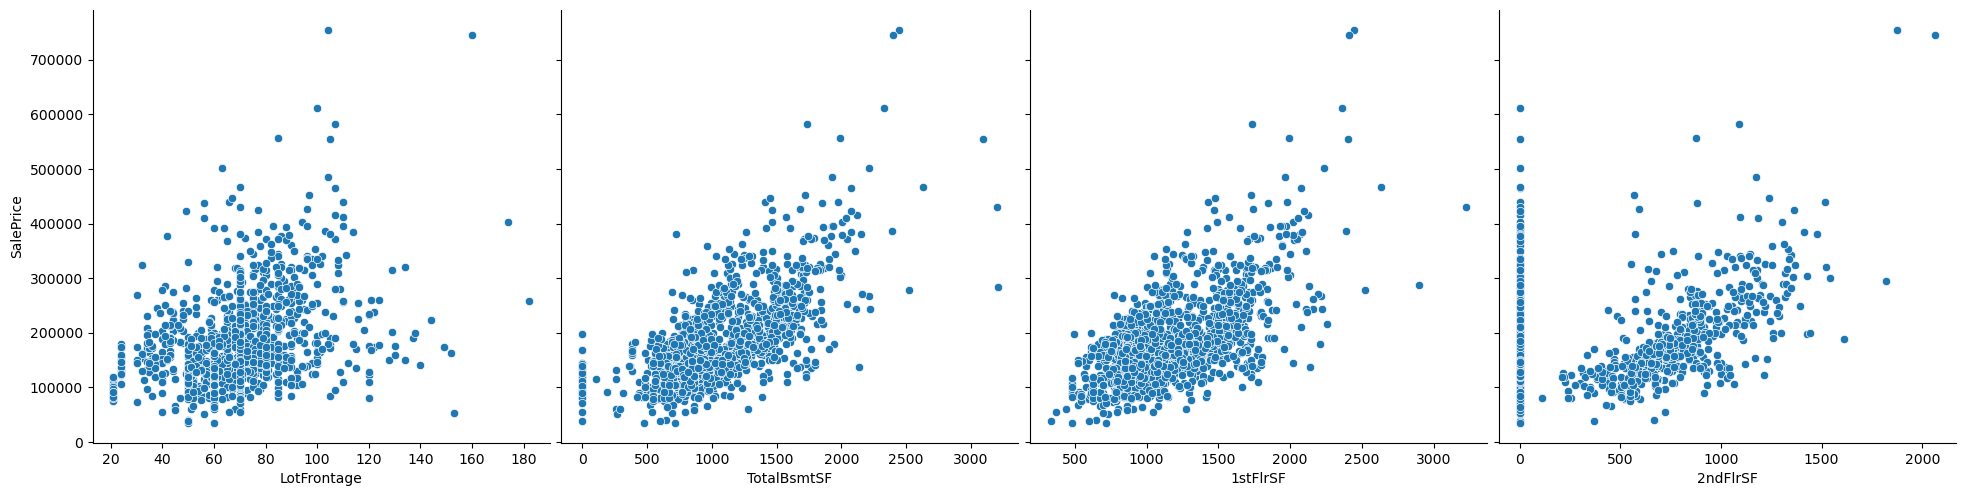

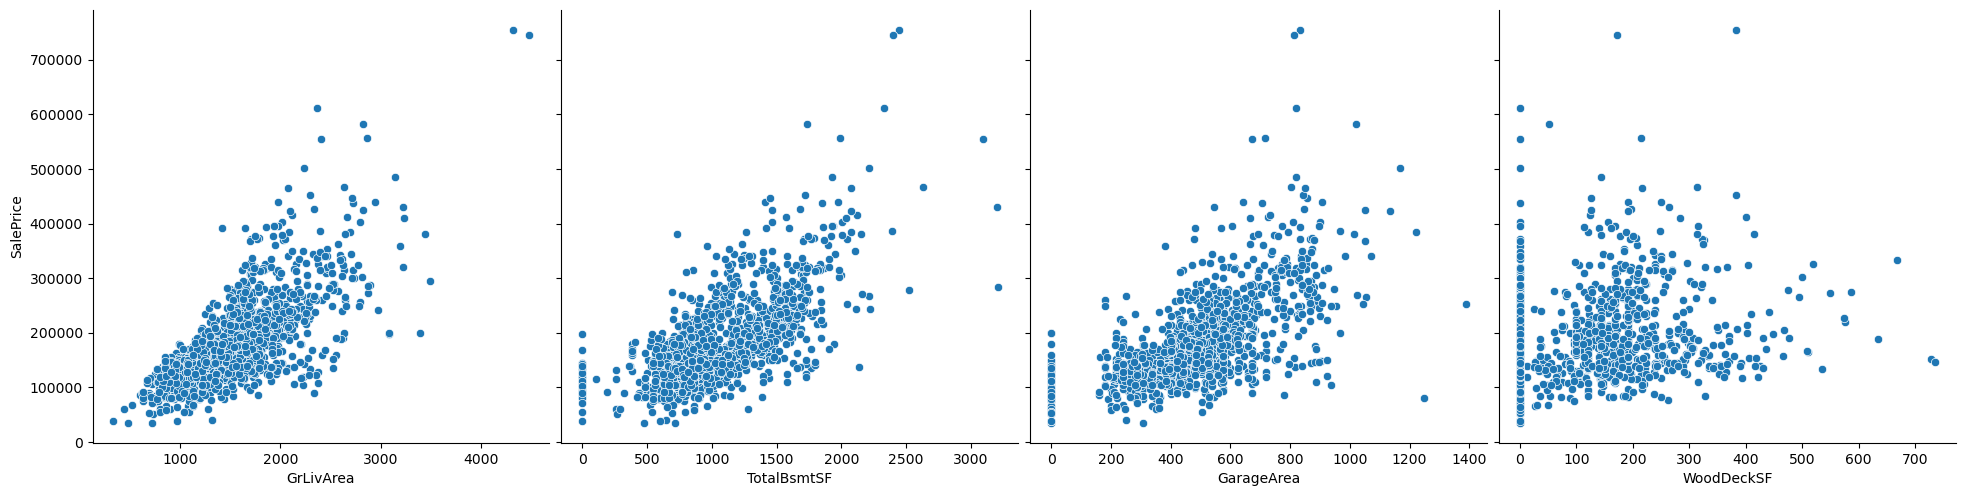

In [31]:
plt.figure(figsize=(15,7))
sns.pairplot(housing_data ,x_vars=['LotArea','OverallQual','MasVnrArea','BsmtFinSF1'], y_vars=['SalePrice'],height=5,aspect=1,kind='scatter')
sns.pairplot(housing_data ,x_vars=['LotFrontage','TotalBsmtSF','1stFlrSF','2ndFlrSF'], y_vars=['SalePrice'],height=5,aspect=1,kind='scatter')
sns.pairplot(housing_data ,x_vars=['GrLivArea','TotalBsmtSF','GarageArea','WoodDeckSF'], y_vars=['SalePrice'],height=5,aspect=1,kind='scatter')
plt.show()

##### Distribution of various variables wrt Target variable can be seen above

In [32]:
cor = housing_data[numerical_cols].corr()

##### Since we have lot of numerical variables ,So we are considering only those variables which have more than `0.4` and less than `-0.4` correlation in heatmap...

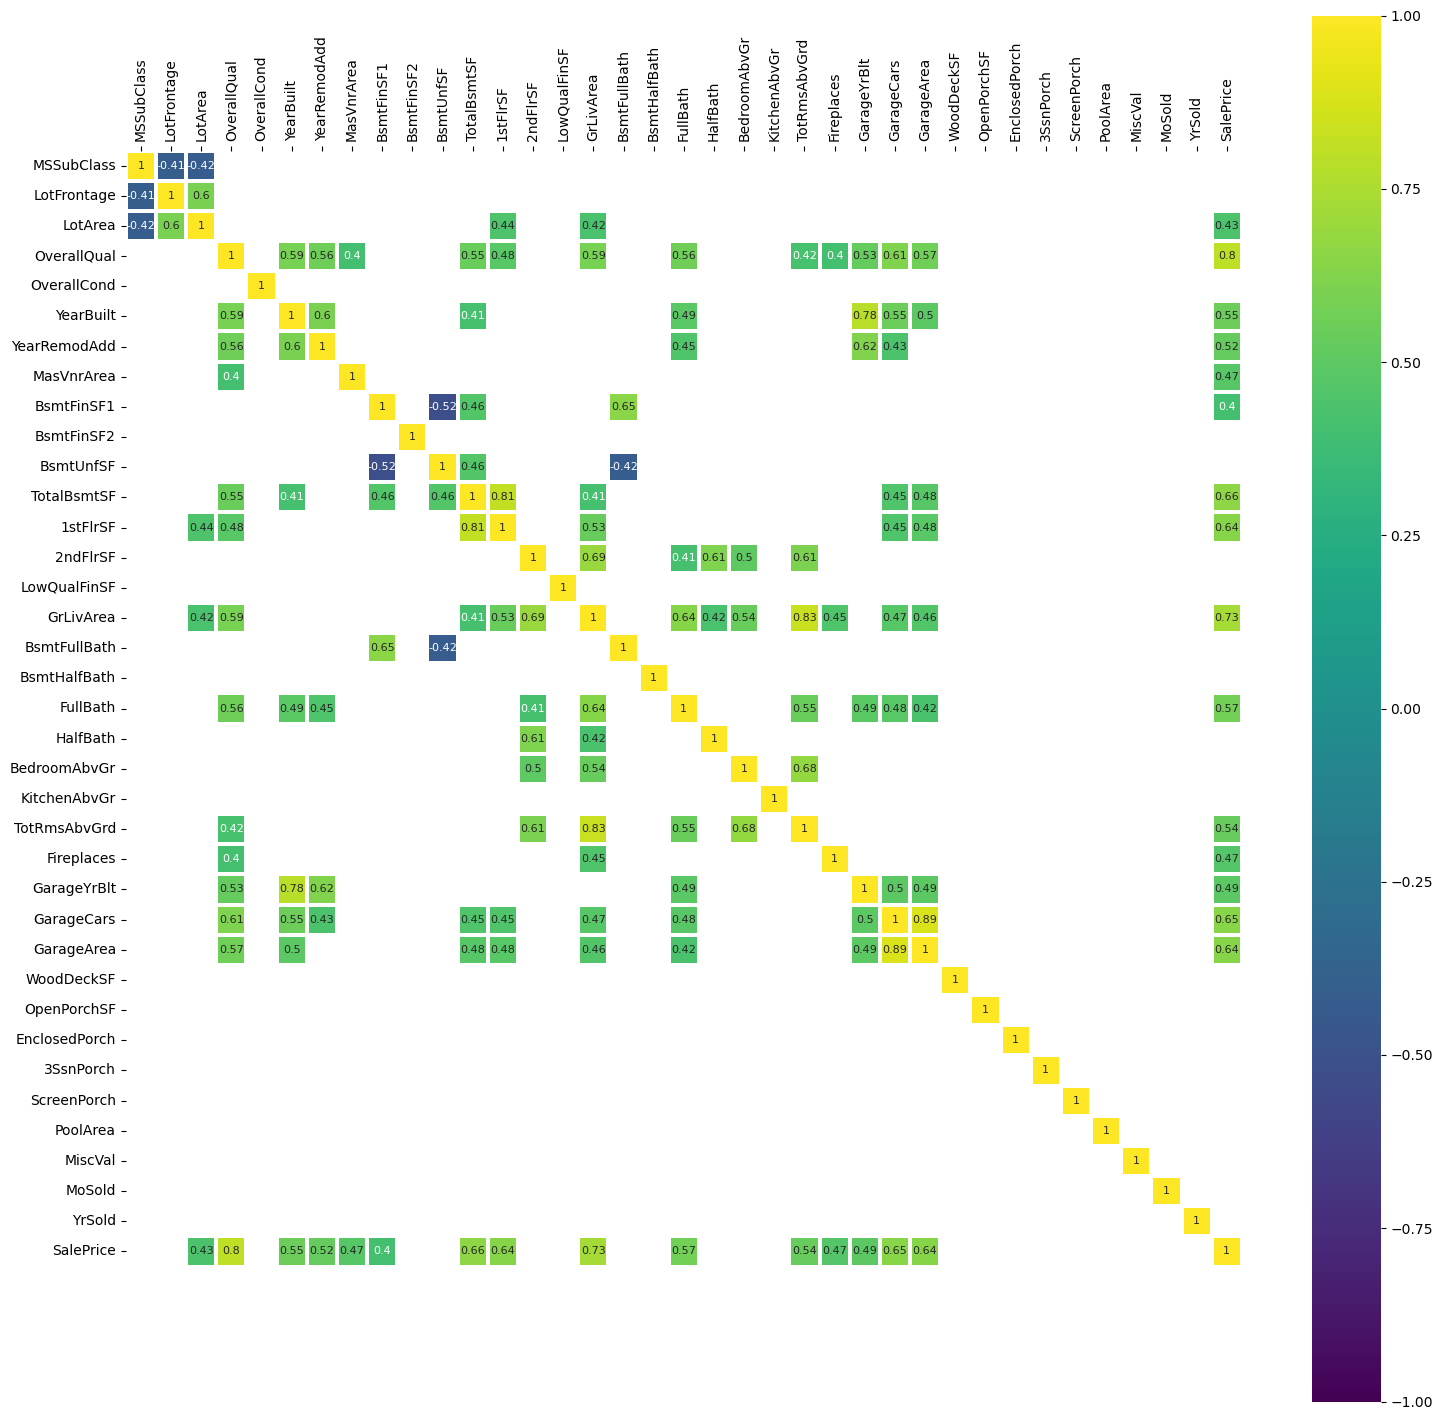

In [33]:
plt.figure(figsize=(18,18))
ax = sns.heatmap(cor[(cor >= 0.4) | (cor <= -0.4)],cmap='viridis', vmax = 1.0, vmin = -1, linewidths=1.5, annot=True, annot_kws={'size': 8},
           square=True)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

#### Columns that are showing strong correlation with Target Column

##### `OverallQual` , `LotArea`,`YearBuilt` , `YearRemodAdd` , `GarageArea` ,`GarageCars`,`GarageYrBuilt`,`FirePlaces`,`TotRmsAbvGrd` , 

##### `GrLivArea`,`1stFlrSF` , `TotalBsmtSF`



#### Columns Showing strong correlation to each other

##### `YearBuilt`  and `GarageYrBuilt` ---- 0.78
##### ` TotalBsmtSF` and `1stFlrSF` ---- 0.81
##### `GrLivArea` and `TotRmsAbvGrd` ---- 0.83
##### `GarageCars` and `GarageArea` ---- 0.89

#####  These columns showing Very Strong Correlation to each other &  these will create multi-collinearity we need to drop one of them for better model


In [34]:
housing_data = housing_data.drop(columns=['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageCars'])

In [35]:
housing_data = pd.get_dummies(housing_data,drop_first=True).astype(int)

In [36]:
housing_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62,7917,6,5,1999,2000,0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,175000,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,20,85,13175,6,6,1978,1988,119,790,163,589,1542,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,70,66,9042,7,9,1941,2006,0,275,0,877,1152,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,20,68,9717,5,6,1950,1996,0,49,1029,0,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,142125,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
X = housing_data.drop(columns=['SalePrice'])
y = housing_data['SalePrice']

In [38]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int32

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train.shape , y_train.shape

((1132, 209), (1132,))

In [42]:
X_test.shape ,y_test.shape

((284, 209), (284,))

In [43]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))

In [44]:
X_train_scaled

array([[ 0.57696579,  0.01421119,  0.53747717, ..., -0.10350983,
         0.46745538, -0.30785965],
       [ 2.51646177, -2.51228414, -2.20087841, ..., -0.10350983,
         0.46745538, -0.30785965],
       [ 3.24377276, -1.89355059, -1.4567695 , ..., -0.10350983,
        -2.13924161,  3.24823343],
       ...,
       [ 2.51646177, -2.35760076, -2.0622642 , ..., -0.10350983,
         0.46745538, -0.30785965],
       [-0.15034521, -0.55296123,  2.02598497, ..., -0.10350983,
         0.46745538, -0.30785965],
       [ 0.09209179,  0.32357797, -0.10426601, ..., -0.10350983,
         0.46745538, -0.30785965]])

In [45]:
y_train_scaled

array([[-0.43705822],
       [-0.85912673],
       [-0.85912673],
       ...,
       [-0.70927992],
       [-0.57816397],
       [ 0.03995412]])

In [46]:
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

### Base Model

In [47]:
regressor_base_model = LinearRegression()
regressor_base_model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [48]:
y_pred_test_base_model = regressor_base_model.predict(X_test_scaled)
y_pred_train_base_model = regressor_base_model.predict(X_train_scaled)

In [49]:
mae_test_base_model = mean_absolute_error(y_test_scaled,y_pred_test_base_model)
mse_test_base_model = mean_squared_error(y_test_scaled,y_pred_test_base_model)
rmse_test_base_model = np.sqrt(mse_test_base_model)
r2_score_test_base_model = r2_score(y_test_scaled,y_pred_test_base_model)

In [50]:
mae_train_base_model = mean_absolute_error(y_train_scaled,y_pred_train_base_model)
mse_train_base_model = mean_squared_error(y_train_scaled,y_pred_train_base_model)
rmse_train_base_model = np.sqrt(mse_train_base_model)
r2_score_train_base_model = r2_score(y_train_scaled,y_pred_train_base_model)

In [51]:
print(f"Train \n\nMean Absolute Error  {mae_train_base_model}\nMean Sqaured Error  {mse_train_base_model}\nRoot Mean Squared Error  {rmse_train_base_model}\nr2_score  {r2_score_train_base_model}")
print(f" \nTest \n\nMean Absolute Error  {mae_test_base_model}\nMean Sqaured Error  {mse_test_base_model}\nRoot Mean Squared Error  {rmse_test_base_model}\nr2_score  {r2_score_test_base_model}")

Train 

Mean Absolute Error  0.1635142933977401
Mean Sqaured Error  0.060098897750246495
Root Mean Squared Error  0.24515076534705432
r2_score  0.9399011022497535
 
Test 

Mean Absolute Error  1104585705.7430813
Mean Sqaured Error  3.4651112098202753e+20
Root Mean Squared Error  18614809184.67948
r2_score  -5.146735628848242e+20


In [52]:
print(f'Train {r2_score(y_train_scaled,y_pred_train_base_model)}')
print(f'Test {r2_score(y_test_scaled,y_pred_test_base_model)}')

Train 0.9399011022497535
Test -5.146735628848242e+20


##### Above r2 score shows extreme Overfitting ,we will try to reduce it with Regularization 

### Ridge Regression

##### We apply GridsearchCV for optimum value of alpha

In [53]:
params = {'alpha': [ 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,1,10,15,50,51,52,55,60,75,80,85,90,95,100]}


ridge = Ridge()

# cross validation
folds = 5
ridge_gridsrch_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_gridsrch_cv.fit(X_train_scaled,y_train_scaled) 

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1,
                                   10, 15, 50, 51, 52, 55, 60, 75, 80, 85, 90,
                                   95, 100]},
             return_train_score=True, scoring='r2', verbose=1)

##### For Ridge

##### Below table shows mean_test_score and mean_train_score with their respective alpha values ....we are getting highest test score on alpha `50`

In [54]:
pd.DataFrame(ridge_gridsrch_cv.cv_results_)[['param_alpha','mean_test_score','mean_train_score']].sort_values(by='mean_test_score',ascending=False).head(10)

,param_alpha,mean_test_score,mean_train_score
11,50,0.901422,0.939634
12,51,0.901421,0.939558
13,52,0.901419,0.939481
14,55,0.901407,0.939252
15,60,0.901371,0.938873
16,75,0.901172,0.937759
17,80,0.901082,0.937395
18,85,0.900982,0.937034
19,90,0.900875,0.936677
20,95,0.900761,0.936322


In [55]:
ridge_gridsrch_cv.best_params_

{'alpha': 50}

In [56]:
ridge_gridsrch_cv.best_score_

0.9014220896863954

In [57]:
ridge_regressor = Ridge(alpha=50)
ridge_regressor.fit(X_train_scaled,y_train_scaled)

Ridge(alpha=50)

In [58]:
y_pred_train_ridge =ridge_regressor.predict(X_train_scaled)
y_pred_test_ridge = ridge_regressor.predict(X_test_scaled)

In [59]:
print(f'Train {r2_score(y_train_scaled,y_pred_train_ridge)}')
print(f'Test  {r2_score(y_test_scaled,y_pred_test_ridge)}')

Train 0.9372471846920757
Test  0.8936514747633264


##### Let's check other metrics also

In [60]:
mae_test_ridge = mean_absolute_error(y_test_scaled,y_pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test_scaled,y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_score_test_ridge = r2_score(y_test_scaled,y_pred_test_ridge)

In [61]:
mae_train_ridge = mean_absolute_error(y_train_scaled,y_pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train_scaled,y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_score_train_ridge = r2_score(y_train_scaled,y_pred_train_ridge)

In [62]:
print(f"Train \n\nMean Absolute Error  {mae_train_ridge}\nMean Sqaured Error  {mse_train_ridge}\nRoot Mean Squared Error  {rmse_train_ridge}\nr2_score  {r2_score_train_ridge}")
print(f" \nTest \n\nMean Absolute Error  {mae_test_ridge}\nMean Sqaured Error  {mse_test_ridge}\nRoot Mean Squared Error  {rmse_test_ridge}\nr2_score  {r2_score_test_ridge}")

Train 

Mean Absolute Error  0.16610478082605665
Mean Sqaured Error  0.06275281530792431
Root Mean Squared Error  0.25050512032276767
r2_score  0.9372471846920757
 
Test 

Mean Absolute Error  0.18471728347459287
Mean Sqaured Error  0.07160062096057547
Root Mean Squared Error  0.2675829235219906
r2_score  0.8936514747633264


### Lasso Regression

##### Let's check best parameters for Lasso

In [63]:
params = { 'alpha' : [0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,15,50,70,100]}

lasso = Lasso()
folds = 5

lasso_gridsrch_cv = GridSearchCV(estimator=lasso,param_grid=params,cv=folds,scoring='r2',return_train_score=True,verbose=1)
lasso_gridsrch_cv.fit(X_train_scaled,y_train_scaled)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 10, 15, 50, 70, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
lasso_gridsrch_cv.best_params_

{'alpha': 0.005}

In [65]:
lasso_gridsrch_cv.best_score_

0.9083274888823327

In [66]:
lasso_regressor = Lasso(alpha=0.005)
lasso_regressor.fit(X_train_scaled,y_train_scaled)

Lasso(alpha=0.005)

##### For Lasso
##### Below table shows mean_test_score and mean_train_score with their respective alpha values ....we are getting highest test score on alpha `0.005`

In [67]:
pd.DataFrame(lasso_gridsrch_cv.cv_results_)[['param_alpha','mean_test_score','mean_train_score']].sort_values(by=['mean_test_score'],ascending=False).head(10)

,param_alpha,mean_test_score,mean_train_score
1,0.005,0.908327,0.936607
0,0.001,0.903674,0.942223
2,0.01,0.903354,0.927805
3,0.02,0.889849,0.910595
4,0.03,0.875776,0.895184
5,0.04,0.864657,0.882776
6,0.05,0.856163,0.872911
7,0.1,0.823784,0.836851
8,0.2,0.747161,0.750235
9,0.3,0.660214,0.663075


In [68]:
y_pred_train_lasso = lasso_regressor.predict(X_train_scaled)
y_pred_test_lasso = lasso_regressor.predict(X_test_scaled)

In [69]:
mae_test_lasso = mean_absolute_error(y_test_scaled,y_pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test_scaled,y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_score_test_lasso = r2_score(y_test_scaled,y_pred_test_lasso)

In [70]:
mae_train_lasso = mean_absolute_error(y_train_scaled,y_pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train_scaled,y_pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_score_train_lasso = r2_score(y_train_scaled,y_pred_train_lasso)

In [71]:
print(f"Train \n\nMean Absolute Error  {mae_train_lasso}\nMean Sqaured Error  {mse_train_lasso}\nRoot Mean Squared Error  {rmse_train_lasso}\nr2_score  {r2_score_train_lasso}")
print(f" \nTest \n\nMean Absolute Error  {mae_test_lasso}\nMean Sqaured Error  {mse_test_lasso}\nRoot Mean Squared Error  {rmse_test_lasso}\nr2_score  {r2_score_test_lasso}")

Train 

Mean Absolute Error  0.1705443595970776
Mean Sqaured Error  0.06609348706283177
Root Mean Squared Error  0.25708653613682647
r2_score  0.9339065129371682
 
Test 

Mean Absolute Error  0.17517277741243484
Mean Sqaured Error  0.0632712903898445
Root Mean Squared Error  0.25153785080946467
r2_score  0.9060230437598261


##### For better Conclusion and Visualization ,lets put all the result in Dataframe

In [72]:
regressor_metrics =  ['Train_r2_score','Test_r2_score','Train_Mean_absolute_error','Test_Mean_absolute_error',
                                    'Train_Mean_squared_error','Test_Mean_squared_error','Train_RMSE','Test_RMSE']

base_model_metric = [r2_score_train_base_model,r2_score_test_base_model,mae_train_base_model,mae_test_base_model,mse_train_base_model,
                     mse_test_base_model,rmse_train_base_model,rmse_test_base_model]
ridge_metric = [r2_score_train_ridge,r2_score_test_ridge,mae_train_ridge,mae_test_ridge,mse_train_ridge,mse_test_ridge,rmse_train_ridge,rmse_test_ridge,]
lasso_metric = [r2_score_train_lasso,r2_score_test_lasso,mae_train_lasso,mae_test_lasso,mse_train_lasso,mse_test_lasso,rmse_train_lasso,rmse_test_lasso]

Result = pd.DataFrame([base_model_metric,ridge_metric,lasso_metric],columns=regressor_metrics,index=['Base_Model','Ridge_Regression','Lasso_Regression']).T

In [73]:
Result

,Base_Model,Ridge_Regression,Lasso_Regression
Train_r2_score,9.399011e-01,0.937247,0.933907
Test_r2_score,-5.146736e+20,0.893651,0.906023
Train_Mean_absolute_error,1.635143e-01,0.166105,0.170544
Test_Mean_absolute_error,1.104586e+09,0.184717,0.175173
Train_Mean_squared_error,6.009890e-02,0.062753,0.066093
Test_Mean_squared_error,3.465111e+20,0.071601,0.063271
Train_RMSE,2.451508e-01,0.250505,0.257087
Test_RMSE,1.861481e+10,0.267583,0.251538


### Let's analyze Residuals

##### Ridge

In [74]:
residuals_train_ridge = y_train_scaled-y_pred_train_ridge
residuals_test_ridge = y_test_scaled - y_pred_test_ridge

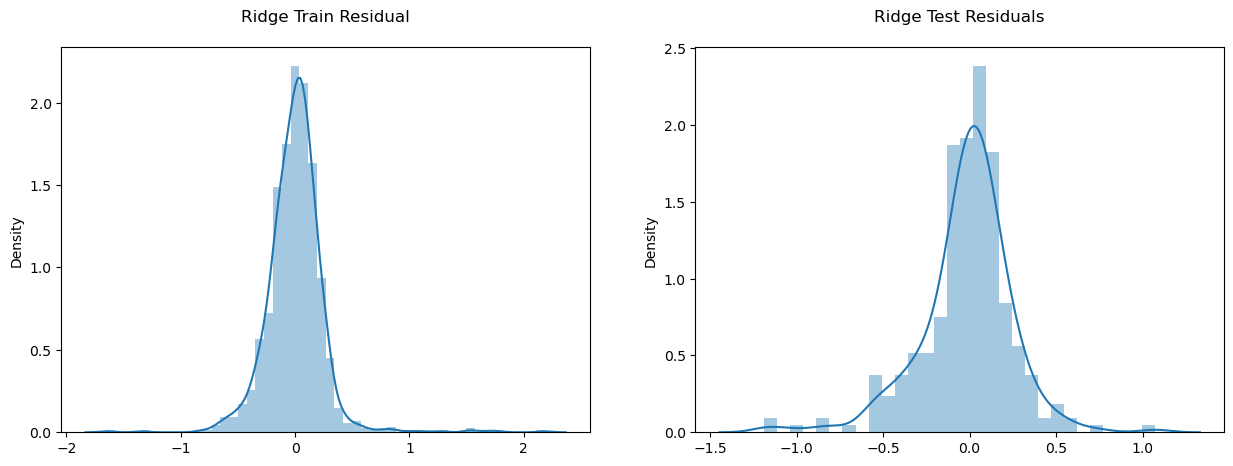

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(residuals_train_ridge)
plt.title('Ridge Train Residual\n')
plt.subplot(1,2,2)
sns.distplot(residuals_test_ridge)
plt.title('Ridge Test Residuals\n')
plt.show()

##### Lasso

In [76]:
residuals_train_lasso = y_train_scaled.ravel() - y_pred_train_lasso
residuals_test_lasso = y_test_scaled.ravel() - y_pred_test_lasso

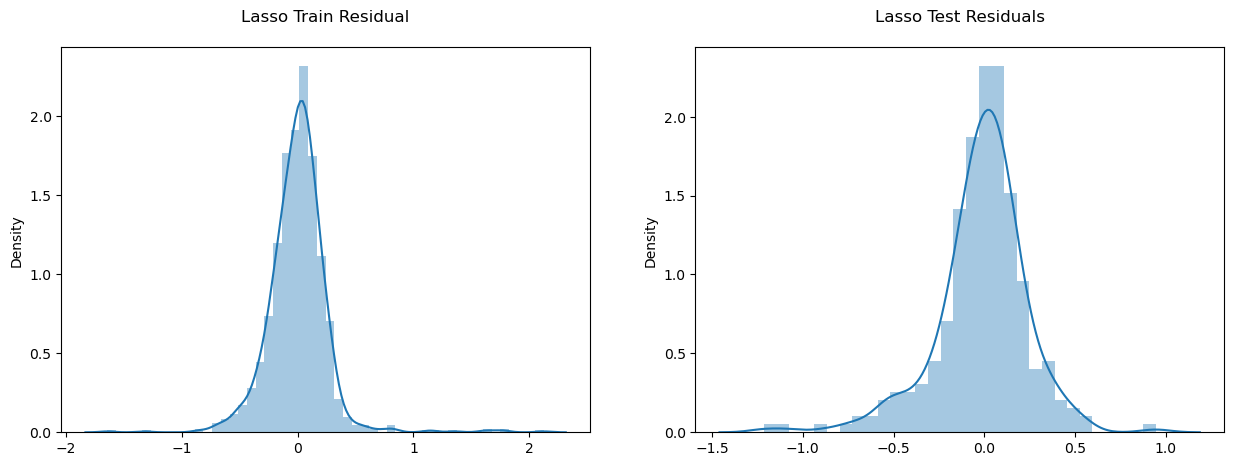

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(residuals_train_lasso)
plt.title('Lasso Train Residual\n')
plt.subplot(1,2,2)
sns.distplot(residuals_test_lasso)
plt.title('Lasso Test Residuals\n')
plt.show()

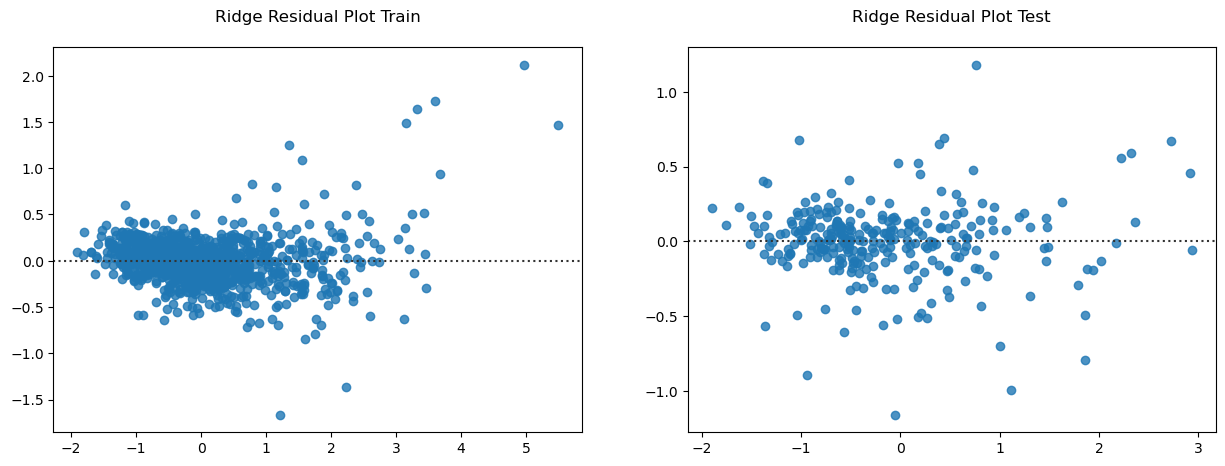

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.residplot(x=y_pred_train_ridge,y=residuals_train_ridge)
plt.title('Ridge Residual Plot Train\n')
plt.subplot(1,2,2)
sns.residplot(x=y_pred_test_ridge,y=residuals_test_ridge)
plt.title('Ridge Residual Plot Test\n')
plt.show()

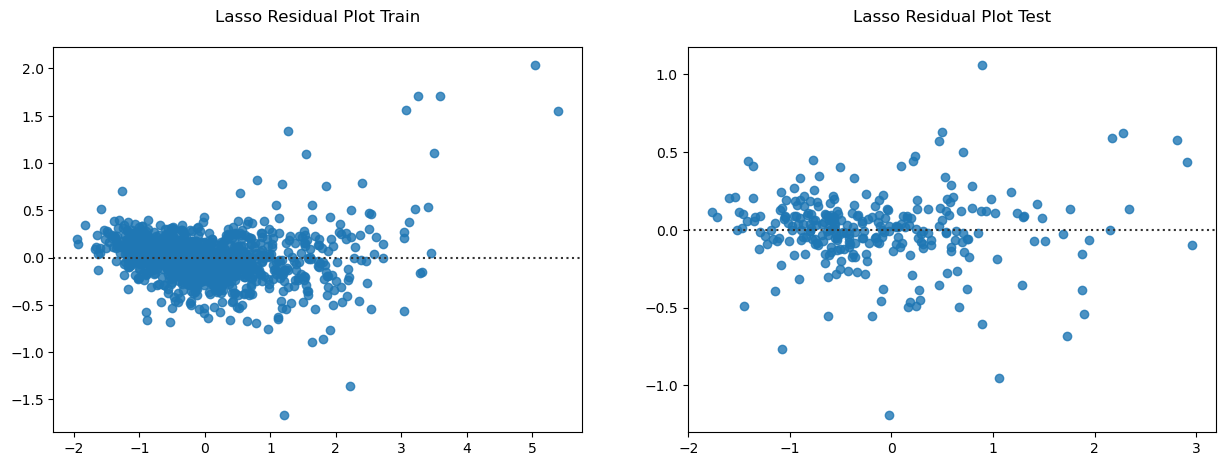

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.residplot(x=y_pred_train_lasso,y=residuals_train_lasso)
plt.title('Lasso Residual Plot Train\n')
plt.subplot(1,2,2)
sns.residplot(x=y_pred_test_lasso,y=residuals_test_lasso)
plt.title('Lasso Residual Plot Test\n')
plt.show()

#### Residuals Analysis: Lasso vs. Ridge Regression

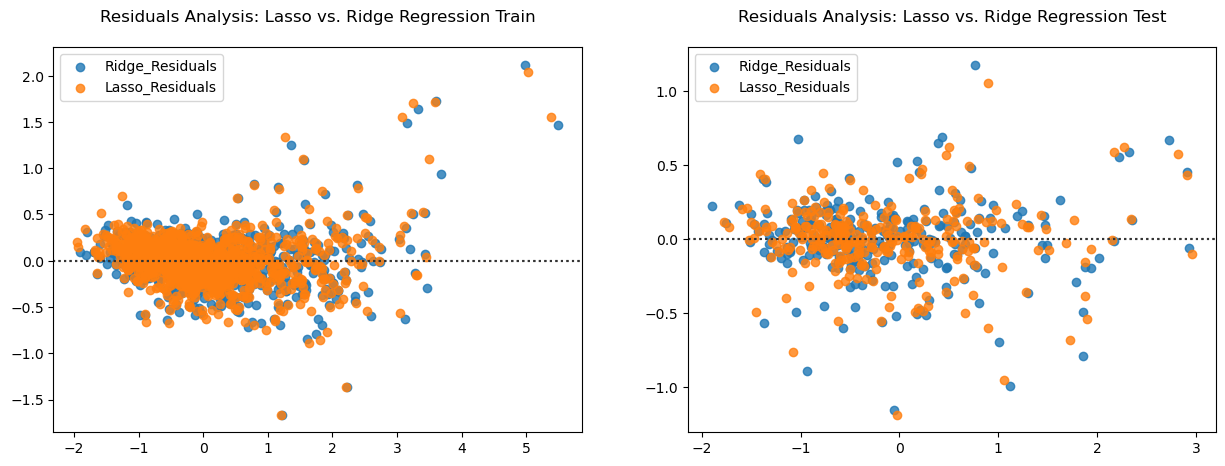

In [80]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.residplot(x=y_pred_train_ridge,y=residuals_train_ridge,label='Ridge_Residuals')
ax = sns.residplot(x=y_pred_train_lasso,y=residuals_train_lasso,label = 'Lasso_Residuals')
plt.title('Residuals Analysis: Lasso vs. Ridge Regression Train\n')
plt.legend()
plt.subplot(1,2,2)
ax = sns.residplot(x=y_pred_test_ridge,y=residuals_test_ridge,label='Ridge_Residuals')
ax = sns.residplot(x=y_pred_test_lasso,y=residuals_test_lasso,label = 'Lasso_Residuals')
plt.title('Residuals Analysis: Lasso vs. Ridge Regression Test\n')
plt.legend(loc='upper left')

plt.show()

### Let's analyze coefficients

In [81]:
ridge_coeff = ridge_regressor.coef_
lasso_coeff = lasso_regressor.coef_

In [82]:
coeff = pd.DataFrame(index=X_train.columns)

In [83]:
coeff['Ridge'] = ridge_coeff.reshape(-1,1)
coeff['Lasso'] = lasso_coeff.reshape(-1,1)

##### Top 10 Variables According to `Lasso`

In [84]:
coeff.nlargest(10,'Lasso')

,Ridge,Lasso
GrLivArea,0.278024,0.390465
OverallQual,0.126333,0.136771
YearBuilt,0.079545,0.121850
BsmtFinSF1,0.109186,0.102961
SaleCondition_Partial,0.053155,0.082665
TotalBsmtSF,0.118020,0.081680
BsmtExposure_Gd,0.071146,0.076671
LotArea,0.082545,0.076054
OverallCond,0.068115,0.069378
Neighborhood_NridgHt,0.064479,0.067939


##### Top 10 Variables According to `Ridge`

In [85]:
coeff.nlargest(10,'Ridge')

,Ridge,Lasso
GrLivArea,0.278024,0.390465
OverallQual,0.126333,0.136771
TotalBsmtSF,0.118020,0.081680
BsmtFinSF1,0.109186,0.102961
LotArea,0.082545,0.076054
YearBuilt,0.079545,0.121850
2ndFlrSF,0.078328,0.000000
BsmtExposure_Gd,0.071146,0.076671
OverallCond,0.068115,0.069378
Neighborhood_StoneBr,0.066658,0.062018


### From our Current model

##### alpha for Ridge  is `50`

##### alpha for Lasso  is `0.005`

### Analysis of model & results when alpha value is doubled from their current value ,let's see one by one

##### For Ridge ,If we double the value of alpha i.e. 100 instead of 50 ...

In [86]:
ridge_regressor_double_alpha = Ridge(alpha=100)
ridge_regressor_double_alpha.fit(X_train_scaled,y_train_scaled)

Ridge(alpha=100)

In [87]:
y_pred_train_ridge_2alpha = ridge_regressor_double_alpha.predict(X_train_scaled)
y_pred_test_ridge_2alpha = ridge_regressor_double_alpha.predict(X_test_scaled)

In [88]:
mae_train_ridge2alpha = mean_absolute_error(y_train_scaled,y_pred_train_ridge_2alpha)
mse_train_ridge2alpha = mean_squared_error(y_train_scaled,y_pred_train_ridge_2alpha)
rmse_train_ridge2alpha = np.sqrt(mse_train_ridge2alpha)
r2_score_train_ridge2alpha = r2_score(y_train_scaled,y_pred_train_ridge_2alpha)

In [89]:
mae_test_ridge2alpha = mean_absolute_error(y_test_scaled,y_pred_test_ridge_2alpha)
mse_test_ridge2alpha = mean_squared_error(y_test_scaled,y_pred_test_ridge_2alpha)
rmse_test_ridge2alpha = np.sqrt(mse_test_ridge2alpha)
r2_score_test_ridge2alpha = r2_score(y_test_scaled,y_pred_test_ridge_2alpha)

In [90]:
print(f"Train \n\nMean Absolute Error  {mae_train_ridge2alpha}\nMean Sqaured Error  {mse_train_ridge2alpha}\nRoot Mean Squared Error  {rmse_train_ridge2alpha}\nr2_score  {r2_score_train_ridge2alpha}")
print(f" \nTest \n\nMean Absolute Error  {mae_test_base_model}\nMean Sqaured Error  {mse_test_ridge2alpha}\nRoot Mean Squared Error  {rmse_test_ridge2alpha}\nr2_score  {r2_score_test_ridge2alpha}")

Train 

Mean Absolute Error  0.16817830488822305
Mean Sqaured Error  0.06563264946687243
Root Mean Squared Error  0.2561886989444937
r2_score  0.9343673505331276
 
Test 

Mean Absolute Error  1104585705.7430813
Mean Sqaured Error  0.07131049172728401
Root Mean Squared Error  0.2670402436474398
r2_score  0.894082404211628


##### For Better Conclusion and Visualization ,Let's put all the metrics in DataFrame

In [91]:
regressor_metrics =  ['Train_r2_score','Test_r2_score','Train_Mean_absolute_error','Test_Mean_absolute_error',
                                    'Train_Mean_squared_error','Test_Mean_squared_error','Train_RMSE','Test_RMSE']


ridge_metric = [r2_score_train_ridge,r2_score_test_ridge,mae_train_ridge,mae_test_ridge,mse_train_ridge,mse_test_ridge,rmse_train_ridge,rmse_test_ridge,]
ridge_metric2alpha = [r2_score_train_ridge2alpha,r2_score_test_ridge2alpha,mae_test_ridge2alpha,mae_train_ridge2alpha,mse_test_ridge2alpha,mse_train_ridge2alpha,
                     rmse_test_ridge2alpha,rmse_train_ridge2alpha]

results_ridge = pd.DataFrame([ridge_metric,ridge_metric2alpha],columns=regressor_metrics,index=['Ridge_Regression','Ridge_Regression_double_alpha']).T
results_ridge['Difference'] = (results_ridge['Ridge_Regression'] - results_ridge['Ridge_Regression_double_alpha'])
results_ridge

,Ridge_Regression,Ridge_Regression_double_alpha,Difference
Train_r2_score,0.937247,0.934367,0.002880
Test_r2_score,0.893651,0.894082,-0.000431
Train_Mean_absolute_error,0.166105,0.185029,-0.018924
Test_Mean_absolute_error,0.184717,0.168178,0.016539
Train_Mean_squared_error,0.062753,0.071310,-0.008558
Test_Mean_squared_error,0.071601,0.065633,0.005968
Train_RMSE,0.250505,0.267040,-0.016535
Test_RMSE,0.267583,0.256189,0.011394


##### The Best Variables According to Ridge Regression with Original alpha and also when alpha value is doubled

In [92]:
coeff_ridge_2alpha = pd.DataFrame(index= X_train.columns)
coeff_ridge_2alpha['Ridge_Regression'] = ridge_regressor.coef_.reshape(-1,1)
coeff_ridge_2alpha['Ridge_Regression_double_alpha'] = ridge_regressor_double_alpha.coef_.reshape(-1,1)
coeff_ridge_2alpha.sort_values(by=['Ridge_Regression'],ascending=False).head(10)

,Ridge_Regression,Ridge_Regression_double_alpha
GrLivArea,0.278024,0.237730
OverallQual,0.126333,0.129413
TotalBsmtSF,0.118020,0.119832
BsmtFinSF1,0.109186,0.105557
LotArea,0.082545,0.081225
YearBuilt,0.079545,0.061185
2ndFlrSF,0.078328,0.074639
BsmtExposure_Gd,0.071146,0.070565
OverallCond,0.068115,0.062286
Neighborhood_StoneBr,0.066658,0.064758


 ##### By Ridge                                          

##### 1) GrLivArea                                   
##### 2) OverallQual                               
##### 3) TotalBsmtSF                             
##### 4) BsmtFinSF1	                           
##### 5) LotArea                   

#### Similar Results can be seen ,iniltially 5 variables that are important from Ridge still the same after the doubling the alpha value

##### For Lasso ,if we double the value of alpha i.e 0.01 instead 0.005

In [93]:
lasso_regressor_2alpha = Lasso(alpha=0.01)
lasso_regressor_2alpha.fit(X_train_scaled,y_train_scaled)

Lasso(alpha=0.01)

In [94]:
y_pred_train_lasso_2alpha = lasso_regressor_2alpha.predict(X_train_scaled)
y_pred_test_lasso_2alpha = lasso_regressor_2alpha.predict(X_test_scaled)

In [95]:
mae_train_lasso2alpha = mean_absolute_error(y_train_scaled,y_pred_train_lasso_2alpha)
mse_train_lasso2alpha = mean_squared_error(y_train_scaled,y_pred_train_lasso_2alpha)
rmse_train_lasso2alpha = np.sqrt(mse_train_lasso2alpha)
r2_score_train_lasso2alpha = r2_score(y_train_scaled,y_pred_train_lasso_2alpha)

In [96]:
mae_test_lasso2alpha = mean_absolute_error(y_test_scaled,y_pred_test_lasso_2alpha)
mse_test_lasso2alpha = mean_squared_error(y_test_scaled,y_pred_test_lasso_2alpha)
rmse_test_lasso2alpha = np.sqrt(mse_test_lasso2alpha)
r2_score_test_lasso2alpha = r2_score(y_test_scaled,y_pred_test_lasso_2alpha)

In [97]:
print(f"Train \n\nMean Absolute Error  {mae_train_lasso2alpha}\nMean Sqaured Error  {mse_train_lasso2alpha}\nRoot Mean Squared Error  {rmse_train_lasso2alpha}\nr2_score  {r2_score_train_lasso2alpha}")
print(f" \nTest \n\nMean Absolute Error  {mae_test_lasso2alpha}\nMean Sqaured Error  {mse_test_lasso2alpha}\nRoot Mean Squared Error  {rmse_test_lasso2alpha}\nr2_score  {r2_score_test_lasso}")

Train 

Mean Absolute Error  0.18196738569345514
Mean Sqaured Error  0.0748137147082496
Root Mean Squared Error  0.2735209584442289
r2_score  0.9251862852917504
 
Test 

Mean Absolute Error  0.1746955144735822
Mean Sqaured Error  0.06308454657380234
Root Mean Squared Error  0.2511663722989253
r2_score  0.9060230437598261


##### For Better Conclusion and Visualization ,Let's put all the metrics in DataFrame

In [98]:
regressor_metrics =  ['Train_r2_score','Test_r2_score','Train_Mean_absolute_error','Test_Mean_absolute_error',
                                    'Train_Mean_squared_error','Test_Mean_squared_error','Train_RMSE','Test_RMSE']

lasso_metric = [r2_score_train_lasso,r2_score_test_lasso,mae_train_lasso,mae_test_lasso,mse_train_lasso,mse_test_lasso,rmse_train_lasso,rmse_test_lasso]
lasso_metric_double_alpha = [r2_score_train_lasso2alpha,r2_score_test_lasso2alpha,mae_train_lasso2alpha,mae_test_lasso2alpha,
                             mse_train_lasso2alpha,mse_test_lasso2alpha,rmse_train_lasso2alpha,rmse_test_lasso2alpha]

Results_lasso = pd.DataFrame([lasso_metric,lasso_metric_double_alpha],columns=regressor_metrics,index=['Lasso_Regression','Lasso_Regression_double_alpha']).T
Results_lasso['Difference'] = (Results_lasso['Lasso_Regression'] - Results_lasso['Lasso_Regression_double_alpha'])
Results_lasso

,Lasso_Regression,Lasso_Regression_double_alpha,Difference
Train_r2_score,0.933907,0.925186,0.008720
Test_r2_score,0.906023,0.906300,-0.000277
Train_Mean_absolute_error,0.170544,0.181967,-0.011423
Test_Mean_absolute_error,0.175173,0.174696,0.000477
Train_Mean_squared_error,0.066093,0.074814,-0.008720
Test_Mean_squared_error,0.063271,0.063085,0.000187
Train_RMSE,0.257087,0.273521,-0.016434
Test_RMSE,0.251538,0.251166,0.000371


##### The Best Variables According to Lasso Regression with Original alpha and also when alpha value is doubled

In [99]:
coeff_lasso_2alpha = pd.DataFrame(index= X_train.columns)
coeff_lasso_2alpha['Lasso_Regression'] = lasso_regressor.coef_.reshape(-1,1)
coeff_lasso_2alpha['Lasso_Regression_double_alpha'] = lasso_regressor_2alpha.coef_.reshape(-1,1)
coeff_lasso_2alpha.sort_values(by=['Lasso_Regression_double_alpha'],ascending=False).head(10)

,Lasso_Regression,Lasso_Regression_double_alpha
GrLivArea,0.390465,0.384695
OverallQual,0.136771,0.166769
YearBuilt,0.121850,0.113368
BsmtFinSF1,0.102961,0.101810
TotalBsmtSF,0.081680,0.080768
SaleCondition_Partial,0.082665,0.080456
BsmtExposure_Gd,0.076671,0.073735
Neighborhood_NridgHt,0.067939,0.072876
LotArea,0.076054,0.070206
OverallCond,0.069378,0.060579


##### By Lasso

##### 1)  GrLivArea
##### 2)  OverallQual	
##### 3 ) YearBuilt	
##### 4) BsmtFinSF1	
##### 5) SaleCondition_Partial	

##### `TotalBsmtSF` comes inplace of `SaleCondition_Partial`  if we double the alpha value in Lasso , and rest four variables are same if we talk about five most important variables

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

##### Top 5 Best variables accoring to  Lasso

In [100]:
coeff[['Lasso']].nlargest(5,'Lasso')

,Lasso
GrLivArea,0.390465
OverallQual,0.136771
YearBuilt,0.121850
BsmtFinSF1,0.102961
SaleCondition_Partial,0.082665


In [101]:
lasso_best5_variables = ['GrLivArea','OverallQual','YearBuilt','BsmtFinSF1','SaleCondition_Partial']

In [102]:
X_train_new = X_train.drop(columns=lasso_best5_variables)

In [103]:
X_train_new_scaled = scaler_x.fit_transform(X_train_new)

In [104]:
params = {'alpha': [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.05,0.06,0.09,0.1,0.2,0.5,1,2,5,10,50]}
folds = 5

lasso_new = Lasso()

lasso_new_gridsrchCV = GridSearchCV(estimator=lasso_new,param_grid=params,cv=folds,return_train_score=True,verbose=1)
lasso_new_gridsrchCV.fit(X_train_new_scaled,y_train_scaled)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                   0.007, 0.008, 0.009, 0.01, 0.02, 0.05, 0.06,
                                   0.09, 0.1, 0.2, 0.5, 1, 2, 5, 10, 50]},
             return_train_score=True, verbose=1)

In [105]:
pd.DataFrame(lasso_new_gridsrchCV.cv_results_)[['param_alpha','mean_test_score','mean_train_score']].sort_values(by='mean_test_score',ascending=False).head()

,param_alpha,mean_test_score,mean_train_score
5,0.006,0.882838,0.921465
4,0.005,0.882802,0.923354
3,0.004,0.882473,0.925156
6,0.007,0.882299,0.919566
2,0.003,0.881820,0.926866


In [106]:
lasso_new = Lasso(alpha=0.006)
lasso_new.fit(X_train_new_scaled,y_train_scaled)

Lasso(alpha=0.006)

In [107]:
lasso_new_coeff = pd.DataFrame(index = X_train_new.columns)

In [108]:
lasso_new_coeff['lasso_new'] = lasso_new.coef_
lasso_new_coeff.nlargest(5,'lasso_new')

,lasso_new
TotalBsmtSF,0.340856
2ndFlrSF,0.233098
FullBath,0.100674
GarageArea,0.097575
LotArea,0.094669


##### After removing original Lasso five most important variables ,the new lasso model give 5 most important variables and they are:-

##### 1) TotalBsmtSF	

##### 2) 2ndFlrSF	

##### 3) FullBath	

##### 4) GarageArea

##### 5) LotArea	